# Chap4 모델 훈련

In [2]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 4.1 선형 회귀

**선형 회귀 모델**  
$$\hat{y}=\theta_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n$$  
- $\hat{y}$ : 예측값  
- n : 특성의 수  
- $x_i$ : i번째 특성값  
- $\theta_j$ : j번째 모델 파라미터 
<br>
<br>

**선형 회귀 모델 훈련**  
모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정해야 한다. 이 때 성능 측정 지표 중 RMSE를 가장 널리 사용한다(회귀). 그러므로 선형 회귀 모델을 훈련시키려면 RMSE를 최소화하는 $\theta$를 찾아야 한다. 아래는 선형 회귀 모델의 MSE 비용 함수이다.  

$$MSE(X,h_\theta)=\frac{1}{m}\sum_{i=1}^{m}(\theta^Tx^{(i)}-y^{(i)})^2$$

## 4.1.1 정규방정식

비용 함수를 최소화하는 $\theta$값을 찾기 위한 수학 공식이 있다. 이를 **정규방정식**이라고 한다.  
<br>
<br>
$$\hat{\theta}=(X^TX)^{-1}X^Ty$$  
- $\hat{\theta}$ : 비용 함수를 최소화하는 $\theta$값  
- y : $y^{(1)}$부터 $y^{(m)}$까지 포함하는 타깃 벡터  

In [21]:
import numpy as np

X = 2*np.random.rand(100,1)
y = 4+3*X + np.random.randn(100,1)

아래 코드에서  
- `np.c_[a,b]` : 두 개의 1차원 배열을 칼럼으로 세로로 붙여서 2차원 배열 만들 때 사용한다.  
- `np.ones(shape, dtype, order)` : 1로 가득한 배열을 생성할 때 이용한다.  
- `np.linalg` : numpy 선형대수 모듈  
- `inv()` : 역행렬 계산할 때 사용한다.  

In [22]:
# 정규방정식을 이용
X_b = np.c_[np.ones((100,1)),X] # 모든 샘플에 x0=1 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [23]:
theta_best

array([[3.61308771],
       [3.35788041]])

||기대한 값|실제 값|
|:---:|:---:|:---:|
$\theta_0$|4|4.215|
$\theta_1$|3|2.770|

잡음 때문에 정확하게 재현을 못했다. (실제 값은 바뀔 수 있다.)

In [24]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # 모든 샘플에 x0 = 1을 추가
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.61308771],
       [10.32884852]])

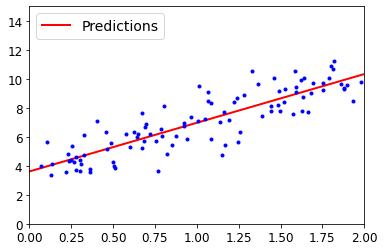

In [25]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions") 
plt.plot(X, y, "b. ") 
plt.legend(loc="upper left", fontsize=14)
plt.axis([ 0, 2, 0, 15]) 
plt.show()

### 사이킷런의 선형 회귀 모델  

선형회귀모델은 특잇값 분해(SVD) 방식을 이용하여 계산된 무어-펜로즈의 유사 역행렬$X^+$를 이용하여 파라미터 $\hat{\theta}$를 계산한다.  
$$\hat{\theta}=X^+y$$

In [26]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [27]:
lin_reg.intercept_, lin_reg.coef_ # 훈련된 모델의 절편, 기울기

(array([3.61308771]), array([[3.35788041]]))

In [28]:
lin_reg.predict(X_new) # (0,2)에 대한 예측값과 앞서 수동으로 계산된 값과 동일

array([[ 3.61308771],
       [10.32884852]])

`np.linalg.lstsq()`함수로 $\hat{\theta}=X^+y$를 계산할 수 있다. 또한 `np.linalg.pinv()`함수로 유사역행렬($X^+$)을 직접 구할 수 있다.
<br>
<br>
유사역행렬 자체는 **특이값 분해(SVD)**라 부르는 표준 행렬 분해 기법을 사용해 계산된다. 정규방정식을 계산하는 것보다 훨씬 효율적이며, 극단적인 경우도 처리 가능하다.  

※ 참고) [SVD 분해](https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-20-%ED%8A%B9%EC%9D%B4%EA%B0%92-%EB%B6%84%ED%95%B4Singular-Value-Decomposition)

In [29]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b,y,rcond=1e-6)

In [30]:
theta_best_svd

array([[3.61308771],
       [3.35788041]])

In [31]:
np.linalg.pinv(X_b).dot(y)

array([[3.61308771],
       [3.35788041]])

## 4.1.2 계산 복잡도

사이킷런의 `LinearRegression` 클래스가 사용하는 SVD 방법은 약 $O(n^2)$이다.  

# 4.2 경사 하강법

경사 하강법의 기본 아이디어는 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것이다. 파라미터 벡터 $\theta$에 대해 비용 함수의 현재 그레이디언트를 계산하고, <u>그레이디언트가 감소하는 방향</u>으로 진행한다. 0이 되면 최솟값에 도달을 의미한다.  

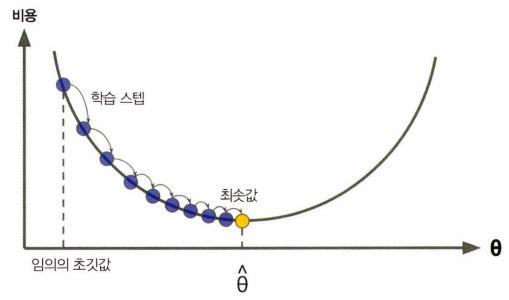  
- 모델 파라미터가 무작위하게 초기화된 후 반복적으로 수정되어 비용 함수를 최소화한다.  
- 학습 스텝 크기는 비용 함수의 기울기에 비례한다. 따라서 파라미터가 최솟값에 가까워질수록 스텝 크기가 점진적으로 줄어든다.  

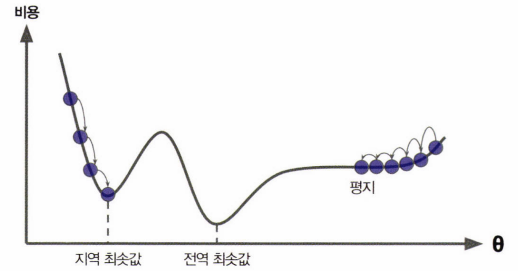
**문제점** 무작위 초기화 때문에 알고리즘이 왼쪽에서 시작하면 전역 최솟값(global minimum)보다 덜 좋은 지역 최솟값(local minimum)에 수렴한다.  
<br>
<br>
`선형 회귀`를 위한 MSE 비용함수는 볼록 함수이기 때문에 지역 최솟값이 없고 하나의 전역 최솟값만 있다. 또한 연속된 함수이고 기울기가 갑자기 변하지 않는다. 따라서 경사 하강법이 전역 최솟값에 가깝게 접근할 수 있다는 것을 보장한다.

## 4.2.1 배치 경사 하강법(p.168)

임의로 지정된 파라미터 $\hat{\theta}$로 시작한 후에 `비용 함수(MSE)`가 작아지는 방향으로 조금씩 파라미터를 조정한다.  

$$비용함수 : MSE(\theta)=MSE(X,h_\theta) = \frac{1}{m}\sum_{i=1}^{m}(\hat{y}^{(i)}-y^{(i)})^2$$  
$$\hat{y}^{(i)}=\theta^Tx^{(i)}=\theta_0+\theta_1x_1^{(i)}+...+\theta_nx_n^{(i)}$$

파라미터를 조정할 때 사용하는 기준은 비용 함수의 그레이디언트 벡터(아래 식)의 방향과 크기이다.  
$$\nabla_\theta MSE(\theta)=\frac{2}{m}X^T(X\theta-y) \; \cdots ①$$ 

파라미터 조정은 아래 방식으로 이루어진다. 아래 식은 경사 하강법의 스텝을 나타내며, $\eta$는 학습률을 가리킨다.  

$$\theta^{(next \ step)}=\theta^{(previous \ step)}-\eta\cdot\nabla_\theta MSE(\theta)$$

<br>
<br> 
※ ①은 매 경사 하강법 스텝에서 전체 훈련 세트 $X$에 대해 계산한다. 그래서 이 알고리즘을 <u>배치경사하강법</u>이라고 한다.

In [58]:
eta = 0.1 # 학습률 
n_iterations = 1000 
m = 100

theta = np .random.randn(2,1) # 무작위 초기화 

for iteration in range (n_iterations): 
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) 
    theta = theta - eta * gradients 

In [59]:
theta

array([[3.61308771],
       [3.35788041]])

위에서 정규방정식으로 찾았을 때와 정확하다. 따라서 경사하강법이 제대로 작동되었다고 할 수 있다.

### 학습률과 모델 학습

아래 그래프는 세 가지 다른 학습률을 사용하여 진행한 경사 하강법의 처음 10단계를 보여준다.  

In [60]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")    # 훈련 세트 산점도
    
    n_iterations = 1000     # 1000번 반복 훈련
    for iteration in range(n_iterations):
        
        # 초반 10번 선형 모델(직선) 그리기
        if iteration < 10:                         
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        
        # 파라미터 조정
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        
        # 조정되는 파라미터를 모두 리스트에 저장 (theta_path=None 옵션이 아닌 경우)
        if theta_path is not None:
            theta_path.append(theta) # 배치 경사 하강법에서 조정되는 파라미터를 저장
            
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

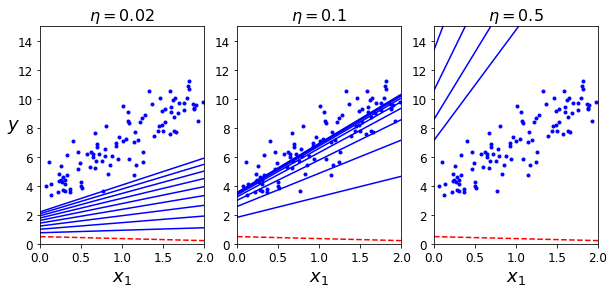

In [62]:
np.random.seed(42)
theta = np.random.randn(2,1)  # 무작위 초기화

plt.figure(figsize=(10,4))    # 도표 크기 지정

# eta=0.02
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)

# eta=0.1
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)

# eta=0.5
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

왼쪽은 학습률일 너무 낮아 최적점에 도달하기에 시간이 오래 걸린다. 가운데는 학습률이 적당하여 반복 몇 번만에 최적점에 수렴한다. 오른쪽은 학습률이 너무 높아 점점 발산한다.  

적절한 학습률을 찾기 위해 그리드 탐색을 사용하는데, 이 때 반복 횟수를 제한하여 시간 낭비를 줄인다. 반복 횟수를 아주 크게 지정하고 벡터의 크기가 어떤 값 $\epsilon$ (허용오차)보다 작아지면 경사 하강법이 거의 최솟값에 도달하여 중지한다.  

**참고**: 사이킷런은 배치 경사 하강법을 지원하는 모델을 제공하지 않는다.

## 4.2.2 확률적 경사 하강법 (p.172)

배치 경사 하강법(GD)의 가장 큰 문제는 <u>매 스탭에서 전체 훈련 세트를 사용해 그레이디언트를 계산하여 매우 느리다는 것이다.</u>

이에 반해 `확률적 경사 하강법(SGD)`은 매 스탭에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트를 계산한다. 매우 큰 훈련 세트도 훈련 가능하며, GD보다 빠르다. 하지만 확률적(무작위)이기 때문에 GD보다 훨씬 불안정하다. (**무작위성**은 지역 최솟값에서 탈출시줘서 좋지만 알고리즘을 전역 최솟값에 다다르지 못하게 한다는 점에서 좋지 않다.)  

이를 해결하기 위해 학습률을 점진적으로 감소시켜, 알고리즘이 전역 최솟값에 도달하게 한다.  

In [63]:
theta_path_sgd = []

m = len(X_b)
np.random.seed(42)

In [64]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼 파라미터

def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.randn(2,1) # 파라미터 랜덤 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [65]:
theta

array([[3.64523916],
       [3.33336685]])

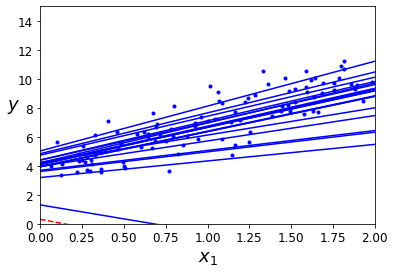

In [66]:
theta = np.random.randn(2,1)    # 파라미터 랜덤 초기화

for epoch in range(n_epochs):
    
    # 매 샘플에 대해 그레이디언트 계산 후 파라미터 업데이트
    for i in range(m):
        
        # 처음 20번 선형 모델(직선) 그리기
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
            
        # 파라미터 업데이트
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)  # 하나의 샘플에 대한 그레이디언트 계산
        eta = learning_schedule(epoch * m + i)        # 학습 스케쥴을 이용한 학습률 조정
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              
plt.show()   

### 사이킷런의 `SGDRegressor` 모델  

`SGDRegressor` 모델은 확률적 경사 하강법을 사용하며 따라서 매우 빠르게 학습한다.

In [67]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel()) # ravel : 다차원 -> 1차원

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [68]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.65740965]), array([3.39978469]))

## 4.2.3 미니배치 경사 하강법 (p.175)

각 스텝에서 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그레이디언트를 계산하는 방법을 **미니배치 경사 하강법**이라 한다. SGD에 비해 미니배치 경사 하강법의 주요 장점은 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해서 얻은 성능 향상이다.

In [69]:
theta_path_mgd = []

n_iterations = 50 # epcoh 수
minibatch_size = 20 # batch size

np.random.seed(42)
theta = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

In [70]:
t = 0 # 훈련에 사용된 미니배치 개수

for epoch in range(n_iterations):
    
    # 에포크가 바뀔 때마다 훈련 데이터 섞기
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    # 20개 데이터 샘플을 훈련할 때마다 파라미터 업데이트
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)        # 학습 스케줄 활용
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [71]:
theta

array([[3.83448515],
       [3.59664528]])

### 배치/확률적/미니배치 경사 하강법 파라미터 학습과정 비교

In [72]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

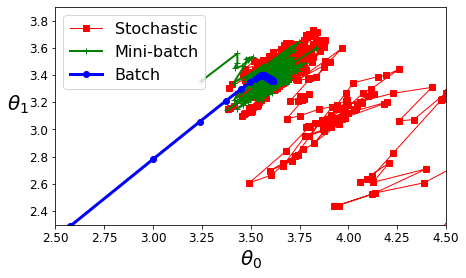

In [73]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic") # 진동
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch") # 덜 진동
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch") # 제대로 수렴
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

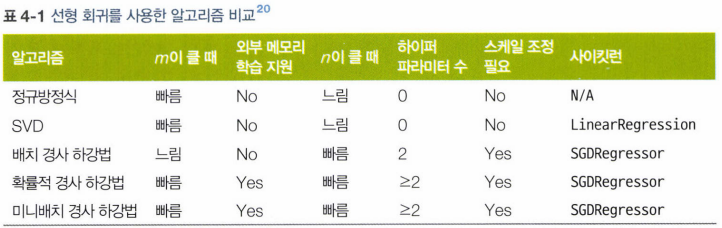

# 4.3 다항 회귀 (p.177)

비선형 데이터를 학습할 때에도 선형 모델을 사용할 수 있다. 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키면 된다. 이를 `다항 회귀`라고 한다.  

In [74]:
# 잡음이 포함된 비선형 데이터셋
m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)

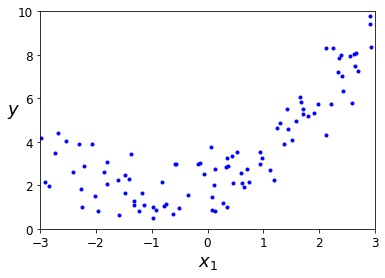

In [75]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

아래 코드는  2차 다항 회귀 변환기 이용하여 하나의 특성 `x1`을 갖는 데이터를 x1과 `x1**2`두 개의 특성을 갖는 데이터로 변환하는 것을 보여준다.  
- `PolynomialFeatures`: 다항 회귀 변환기  
- `degree=2`: 2차 다항식을 활용하라고 지정하기. 3, 4, 등 임의의 양의 정수를 사용할 수 있음.  
- `include_bias=False`: 절편(편향)을 변환된 어레이에 추가할지 여부 지정. 기본값은 True 이지만 여기서는 사용하지 않음. 이유는 변환된 어레이를 LinearRegression() 모델에서 사용할 예정이며, 거기서 입력 어레이는 편향을 사용하지 않기 때문임.

In [76]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [77]:
X[0] # 원래 특성 x1만 갖고 있음

array([2.38942838])

In [78]:
X_poly[0] # 변환된 데이터는 두 개의 특성 x1, x1^2를 갖고 있음

array([2.38942838, 5.709368  ])

In [79]:
# 선형 회귀 학습
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [80]:
lin_reg.intercept_, lin_reg.coef_ # 절편 파라미터, x1,x1^2에 대한 각각의 파라미터

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

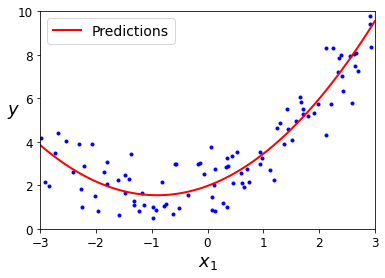

In [81]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)     # 새로운 샘플 100개
X_new_poly = poly_features.transform(X_new)       # 2차 다항 회귀 모델 데이터로 변환
y_new = lin_reg.predict(X_new_poly)               # 예측하기

plt.plot(X, y, "b.")                                            # 기존 데이터 산점도
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")  # 예측값 그래프

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

# 4.4 학습 곡선(p.179)

- 초록 실선 그래프 : 300차 다항 회귀 모델  
- 파랑 파선 그래프 : 2차 다항 회귀 모델  
- 빨강 철망 그래프 : 1차 선형 회귀 모델

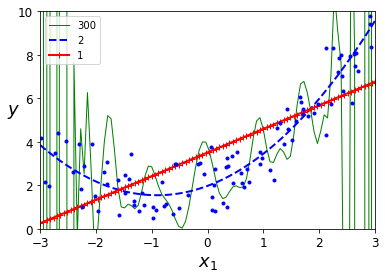

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 세 개의 다항 회귀 모델 지정: 차례 대로 300차 다항 회귀, 2차 다항 회귀, 1차 선형 회귀 모델의 예측값 그래프 그리기
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):   
    
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)  # 다항 특성 변환기
    std_scaler = StandardScaler()                                             # 표준화 축척 조정
    lin_reg = LinearRegression()                                              # 선형 회귀 모델
    
    polynomial_regression = Pipeline([                         # 파이프라인: 전처리 + 선형 회귀 모델
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    
    polynomial_regression.fit(X, y)                                            # 훈련
    y_newbig = polynomial_regression.predict(X_new)                            # 예측
    
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)       # 그래프 그리기

plt.plot(X, y, "b.", linewidth=3)                                              # 원 데이터 산점도
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

300차 다항 회귀는 심각하게 훈련 데이터에 과대적합되었다. 반면 선형모델(1차)은 과소적합이다. 이 경우 가장 일반화가 잘될 모델은 2차 다항회귀이다.  

---
2장에서 성능 추정을 위해 교차 검증을 사용하여 과대적합/과소적합인지 알아보았다. 또 다른 방법은 **학습 곡선**을 살펴보는 것이다.

In [83]:
# 훈련 데이터에서 모델의 학습 곡선을 그리는 함수
# 훈련세트와 검증세트에 대한 평균 제곱근 오차(RMSE)의 변하를 추적하는 그래프를 그림

from sklearn.metrics import mean_squared_error           # MSE 수동 계산
from sklearn.model_selection import train_test_split     # 무작위 샘플링

def plot_learning_curves(model, X, y):
    # 8:2 로 분류
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []                    # MSE 추적 장치

    for m in range(1, len(X_train)):                     # m 개의 훈련 샘플을 대상으로 훈련
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        # MSE 기록
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)  
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14) 

## 과소 적합 모델의 학습 곡선 특징

2차 다항식으로 생성된 데이터셋에 대한 선형 회귀 모델의 학습 곡선은 아래 그래프와 같으며, 과소 적합을 보여준다.(전형적인 모습)  
1) 훈련 데이터(빨강)의 성능  
    - 훈련 세트가 커지면서 RMSE가 커진다.  
    - 훈련 세트가 어느 정도 커지면 더 이상 RMSE가 크게 나아지거나 나빠지지 않는다.  

2) 검증 데이터(파랑)의 성능  
    - 검증 세트에 대한 성능이 훈련 세트에 대한 성능과 거의 비슷해진다.  
    
＊ 모델이 훈련 데이터에 과소적합되어 있다면 훈련 샘플을 더 추가해도 효과가 없다. 더 복잡한 모델을 사용하거나 더 나은 특성을 선택해야 한다.  

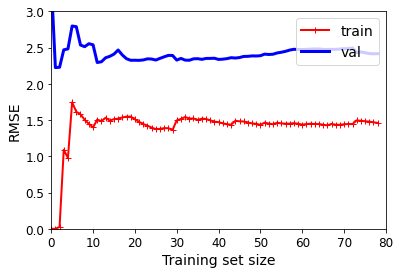

In [84]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                        
plt.show()        

## 과대 적합 모델의 학습 곡선 특징

2차 다항식으로 생성된 데이터셋에 대해 10차 다항 회귀를 적용한 선형 회귀 모델의 학습 곡선은 아래 그래프와 같으며, 과대 적합을 보여준다.(전형적인 모습)  
1) 훈련 데이터(빨강)의 성능  
    - 훈련 데이터에 대한 RMSE가 매우 낮다.  
    
2) 검증 데이터(파랑)의 성능  
    - 훈련 데이터에 대한 성능과 차이가 크게 벌어진다.  
    
3) 이전 그래프와 차이점  
    - 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮다.  
    - 두 곡선 사이에 공간이 있다. 즉, 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 의미이고, 이는 과대적합의 특징이다.  그러나 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워진다.  

＊ 검증 오차가 훈련 오차에 근접할 때 까지 훈련 데이터를 추가하여 과대적합을 개선할 수 있다.  

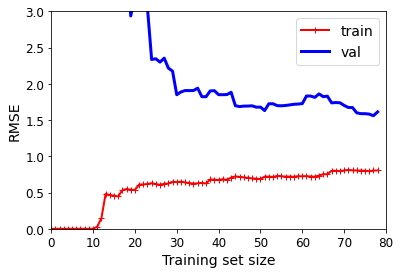

In [85]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # 책에는 없음
plt.show()                        # 책에는 없음

# 4.5 규제가 있는 선형 모델 (p.184)

앞에서 봤듯이 과대적합을 감소시키기 좋은 방법은 모델을 규제하는 것이다. (즉, 모델을 제한한다.) 다항 회귀 모델을 규제하는 간단한 방법은 다항식의 차수를 감소시키는 것이다. 선형 회귀 모델에서는 보통 <u>모델의 가중치를 제한</u>함으로써 규제를 가한다. 이에 관해 릿지 **회귀, 라쏘 회귀, 엘라스틱넷**을 살펴볼 것이다.  

[더 알아보기](https://challenge.tistory.com/30)

## 4.5.1 릿지 회귀

릿지 회귀(티호노프 규제)는 규제가 추가된 선형 회귀 버전이다. <u>L2-norm이라고 부르는 패널티항을 통해 일반 선형회귀 모델에 패널티를 부과하는 방법이다.</u>

### 릿지 회귀의 비용함수
$$J(\theta)=MSE(\theta)+\frac{\alpha}{2}\sum_{i=1}^{n}\theta^2_i$$  

- 마지막 항은 규제항으로, 훈련하는 동안에만 비용 함수에 추가된다. 모델의 훈련이 끝나면 규제가 없는 성능 지표로 평가한다.  
- $\alpha$는 모델을 얼마나 많이 규제할지 조절한다. $\alpha=0$이면 릿지 회귀는 선형 회귀와 같아진다. $\alpha$가 클수록 모든 다중치가 거의 0에 가까워진다.  

`alpha` : 규제 강도를 나타내며 값이 클수록 규제가 세진다.  
`solver` : 경사하강법을 계산하는 옵티마이저 지정한다. `cholesky`로 지정하면 정규방정식을 이용해 최적의 파라미터를 계산한다.

In [3]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

`solver="sag"` : 경사하강법을 지원하는 다양한 옵티마이저 중에 하나로, sag는 L1 제약조건만을 지원하고, saga는 L1, L2 제약조건 둘 다 지원함

In [5]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

아래는 다양한 `alpha`값의 영향력을 그래프로 보여준다. 오른쪽 그래프는 10차 다항 회귀가 적용된 경우 3개를 보여준다. `alpha`를 크게 할수록 예측값의 그래프가 직선에 가까워짐을 볼 수 있다.  

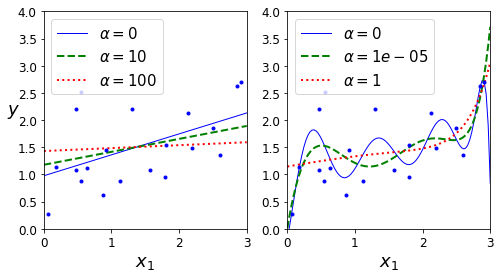

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),           # 표준화 축척 조정
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

In [11]:
from sklearn.linear_model import SGDRegressor

# sgd 사용
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.46543286])

`penalty=l2` : 사용할 규제를 지정. `l2`는 gsd가 비용 함수에 가중치 벡터의 l2 노름의 제곱을 2로 나눈 규제항을 추가하게 만든다.

## 4.5.2 라쏘 회귀

라쏘(Lasso) 회귀는 비용 함수에 규제항을 더하는데 가중치 벡터의 l1 노름을 사용한다.  

### 라쏘 회귀의 비용 함수
$$J(\theta)=MSE(\theta)+\alpha\sum_{i=1}^{n}|\theta_i|$$  
- $\theta_i=0(i=1,2,...,n)$에서 미분 가능하지 않다. 하지만 $\theta_i=0$일 때 서브그레이디언트 벣터 g를 사용하면 경사 하강법을 적용하는 데 문제가 없다.  

C:\Users\dldms\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827432, tolerance: 0.0009294783355207351
  positive)


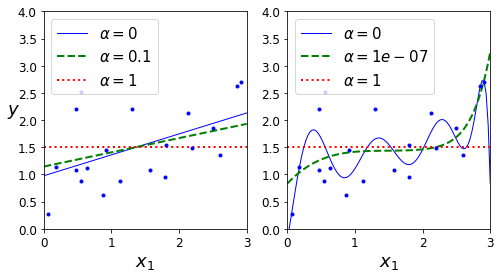

In [12]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)
plt.show()

- 라쏘 회귀의 중요한 특징은 <u>덜 중요한 특성의 가중치를 제거</u>하려고 한다. (즉, 가중치가 0이 된다.) → 자동으로 특성 선택을 하고 희소 모델을 만든다. (0이 아닌 특성의 가중치가 적다.)  

In [13]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

## 4.5.3 엘라스틱넷

- 엘라스틱넷은 릿지 회귀와 라쏘 회귀를 절충한 모델이다. 규제항은 릿지와 회귀의 규제항을 단순히 더해서 사용하며, 혼합 정도는 혼합 비율 r로 조절한다. 
     - r=0 : 릿지회귀와 같음
     - r=1 : 라쏘회귀와 같음  
     
### 엘라스틱넷 비용 함수  
$$J(\theta)=MSE(\theta)=r\alpha\sum_{i=1}^{n}|\theta_i|+\frac{1-r}{2}\alpha\sum_{i=1}^{n}{\theta_i}^2$$  

### 선형 회귀(규제x), 릿지, 라쏘, 엘라스틱넷의 쓰임  
- 규제가 약간 있는 것이 좋기 때문에 평범한 선형 회귀는 피해야 한다.  
- 릿지가 기본, But 특성이 몇 개 없다면 라쏘나 엘라스틱넷을 선택한다.  
- 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 라쏘보다는 엘라스틱넷을 선호한다.  

In [15]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## 4.5.4 조기 종료

- 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 것을 **조기 종료**라고 한다. 
- SGD나 mini-batch GD에서 곡선이 매끄럽지 않아 최솟값에 도달했는지 확인이 어려울 수 있다. 그래서 검증 에러가 일정 시간 최솟값보다 클 때 학습을 멈추고 검증 에러가 최소였을 때의 모델로 되돌아 간다.  

In [27]:
from sklearn.base import clone
from sklearn.metrics import mean_squared_error

# 데이터 준비
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# warm_start = True : fit() 함수가 처음부터 다시 시작하지 않고 이전 모델 파라미터에서 훈련을 이어감
sgd_reg = SGDRegressor(max_iter=10, tol=np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.005)
minimum_val_error = float("inf")
bset_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict= sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

# 4.6 로지스틱 회귀

## 4.6.1 확률 추정

## 4.6.2 훈련과 비용 함수

## 4.6.3 결정 경계

## 4.6.4 소프트맥스 회귀